In [50]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [51]:
df=pd.read_csv('insurance_fraud.csv')

In [52]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [53]:
df.shape

(1000, 40)

In [54]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [55]:
# checking the null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

we can observe that there is missing values in 2 columns authorities_contacted and _c39

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Handling Missing Values

In [57]:
df.drop(['_c39'],axis=1,inplace=True)

In [58]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


_c39 has been deleted.

In [59]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64


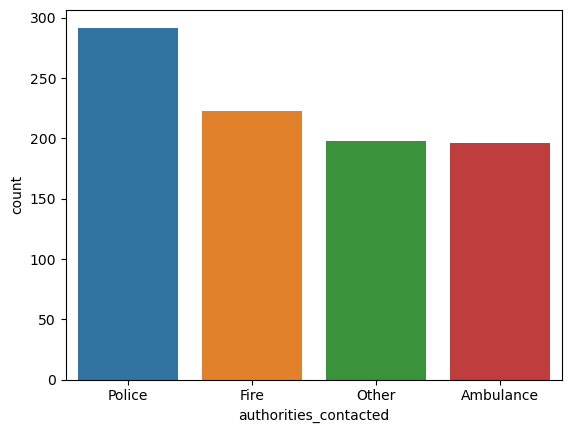

In [60]:
#checking no of unique values in authorities_contacted column
df['authorities_contacted'].value_counts()
ax=sns.countplot(x="authorities_contacted", data=df)
print(df['authorities_contacted'].value_counts())

In [61]:
#Handling the missing values in authorities_contacted column by using mode method 
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

In [62]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

no missing values in data set

# EDA EXPLORATARY DATA ANALYS

In [64]:
#statistical summary of numerical columns
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


we can see no missing values and there is a skewness in some columns and outliers are also present there is huge difference between 75% to max.

In [65]:
#checking for categorical col
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
           categorical_col.append(i)
print("Categorical columns: ",categorical_col)
print("\n")


#checking for Numerical col
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
           numerical_col.append(i)
print("Numerical columns: ",numerical_col)
print("\n")

Categorical columns:  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns:  ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']




fraud_reported
N    753
Y    247
Name: count, dtype: int64


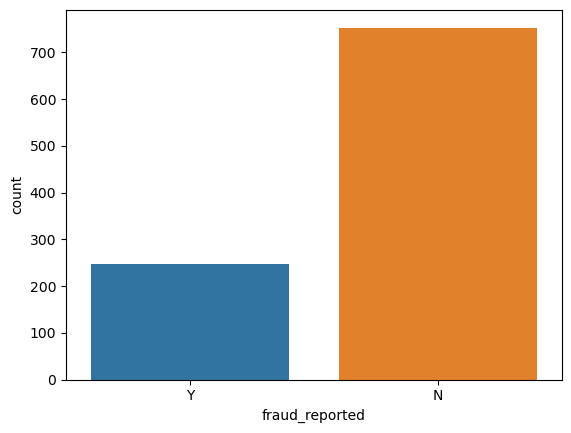

In [66]:
#checking no of unique values in target column
df['fraud_reported'].value_counts()
ax=sns.countplot(x="fraud_reported", data=df)
print(df['fraud_reported'].value_counts())

N has high values then Y

<Axes: xlabel='age', ylabel='Density'>

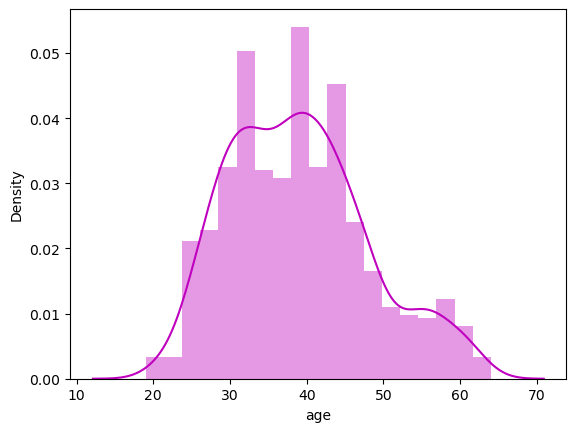

In [68]:
#age distribution
sns.distplot(df['age'], color="m")

age is normally dstributed.

<Axes: xlabel='age', ylabel='count'>

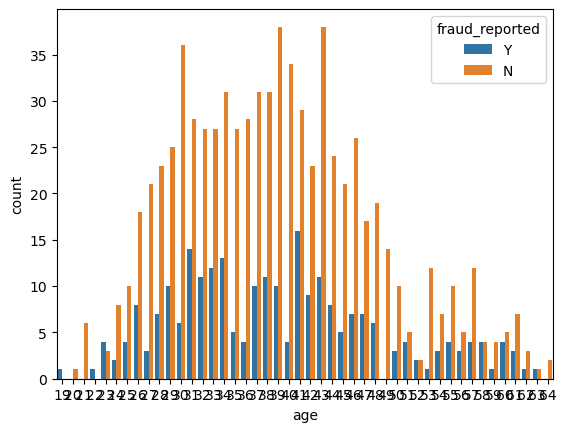

In [69]:
#comparing the no of people 'age with fraud_reported
sns.countplot(x='age', hue='fraud_reported', data=df)

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64


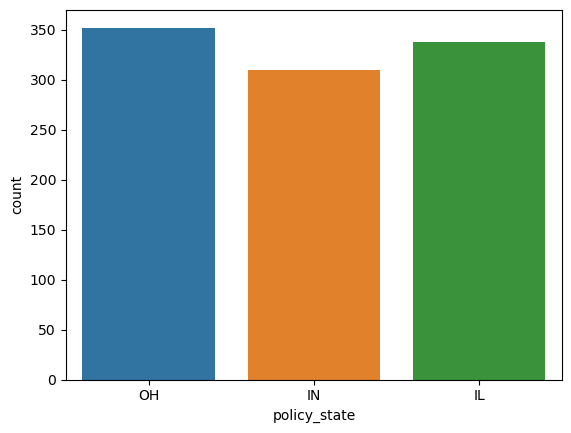

In [70]:
#visualize the number of exited columns
ax=sns.countplot(x="policy_state",data=df)
print(df['policy_state'].value_counts())

policy state OH,IN and IL almost equal values

<Axes: xlabel='policy_state', ylabel='count'>

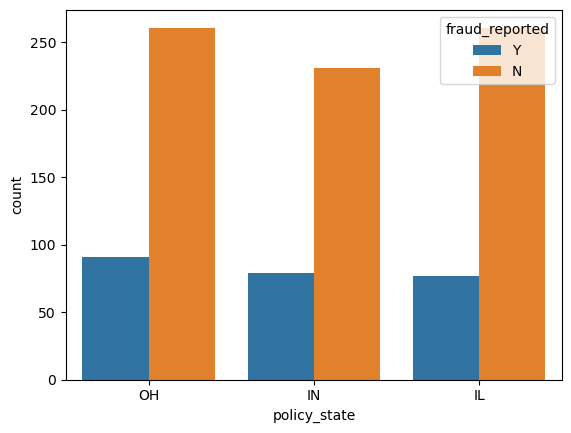

In [71]:
#comparing the no of people policy_state with fraud_reported
sns.countplot(x='policy_state', hue='fraud_reported', data=df)

In [72]:
#checking the number of unique  values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64


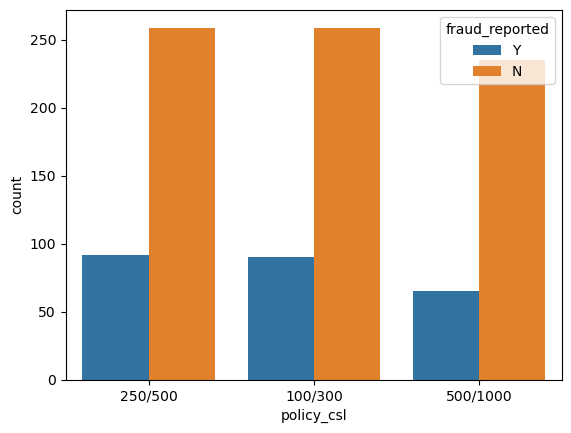

In [73]:
#comparing the no of people policy_csl with fraud_reported
sns.countplot(x='policy_csl', hue='fraud_reported', data=df)
print(df['policy_csl'].value_counts())

policy_deductable
1000    351
500     342
2000    307
Name: count, dtype: int64


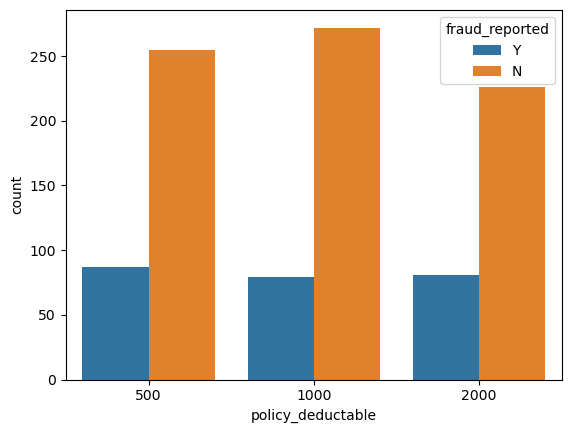

In [74]:
#comparing the no of people policy_deductable with fraud_reported
sns.countplot(x='policy_deductable', hue='fraud_reported', data=df)
print(df['policy_deductable'].value_counts())

Detecting outliers

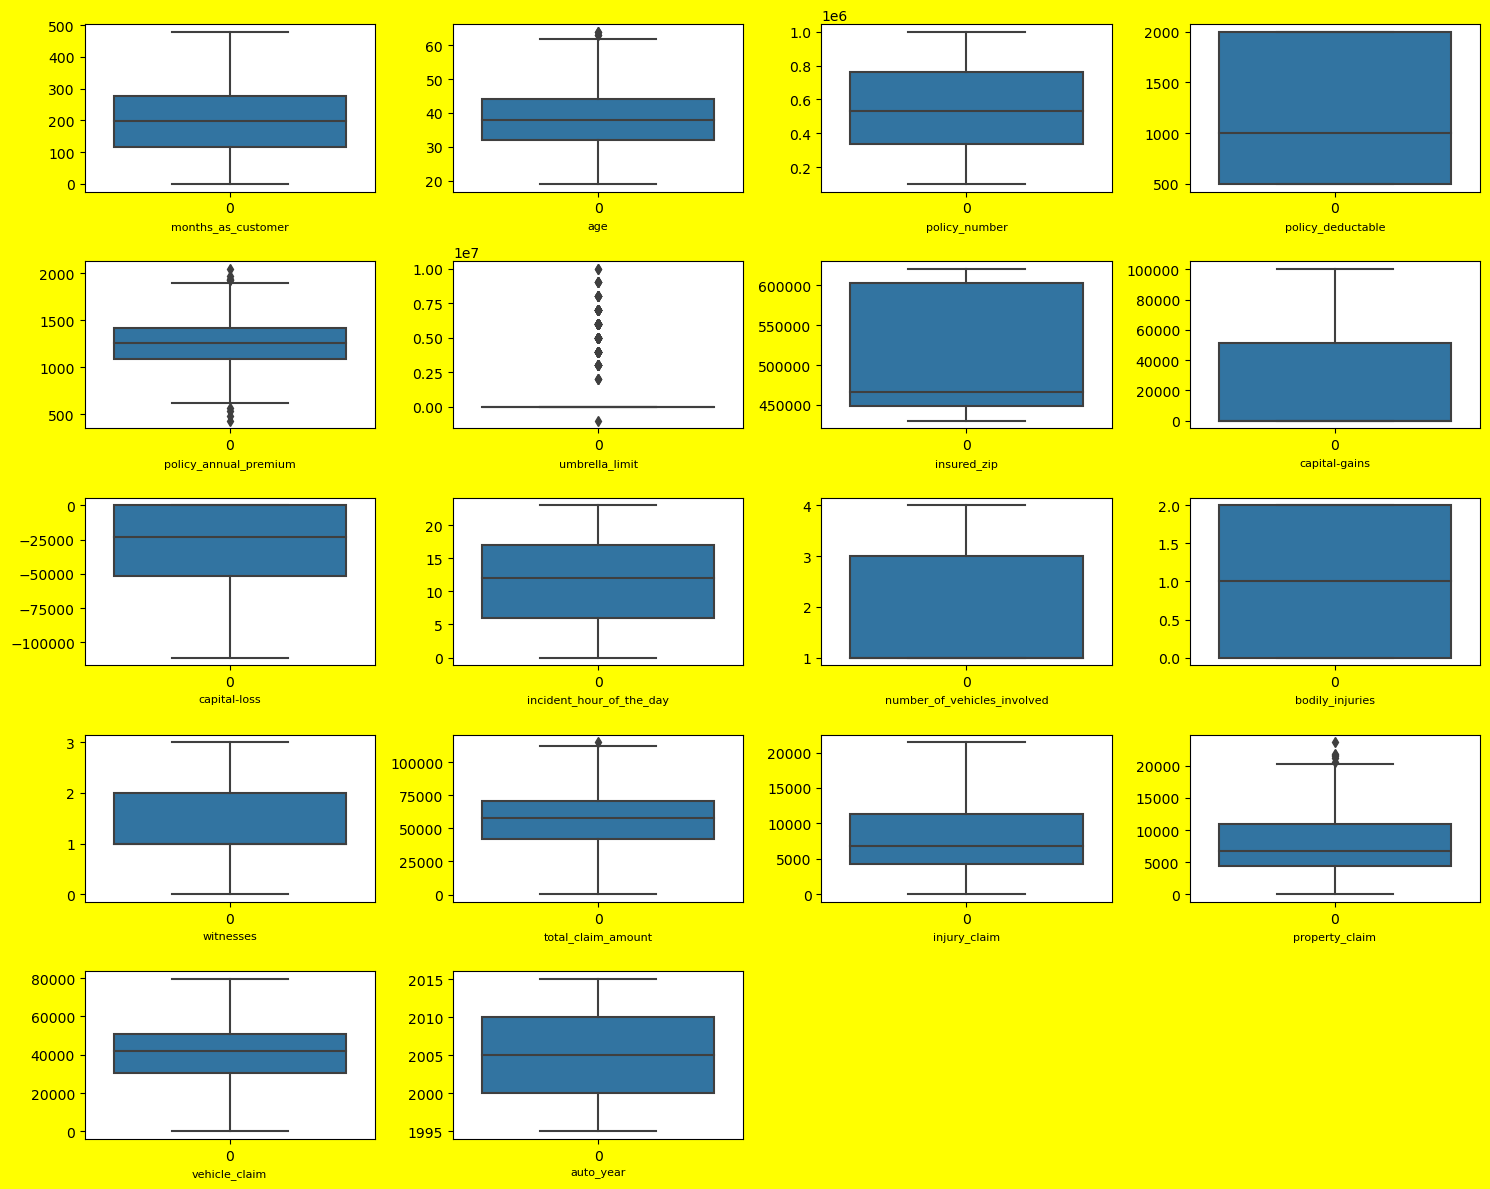

In [75]:
# visulizing the outliers by boxplot
plt.figure(figsize=(15,12), facecolor= "yellow")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(5,4, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=8)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

we can observe some outliers in some columns. Going to delete the outliers.

In [76]:
#REMOVING THE OUTLIERS DATA BY USING Z SCORE METHOD
from scipy.stats import zscore

z=np.abs(zscore(df[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']]))
z

,age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim
0,0.990836,0.616705,0.479476,0.714257,1.165505
1,0.334073,0.242521,1.697980,1.807312,1.372696
2,1.088913,0.642233,1.697980,0.686362,0.736072
3,0.224613,0.652886,2.133471,0.403135,0.219722
4,0.552994,1.341980,2.133471,1.753121,1.399654
...,...,...,...,...,...
995,0.103769,0.222884,0.479476,1.305049,0.273817
996,0.224613,0.739141,0.479476,2.111466,2.214794
997,0.541611,0.520739,0.826998,0.558507,0.020826
998,2.523284,0.411866,1.697980,0.219110,0.451976


In [77]:
#threesold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2],
       dtype=int64))

In [78]:
z.iloc[31,2]

3.0044538458871766

In [79]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(981, 39)

In [80]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 1000
new data frame.-- 981


In [81]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 1.9


In [82]:
df=df1

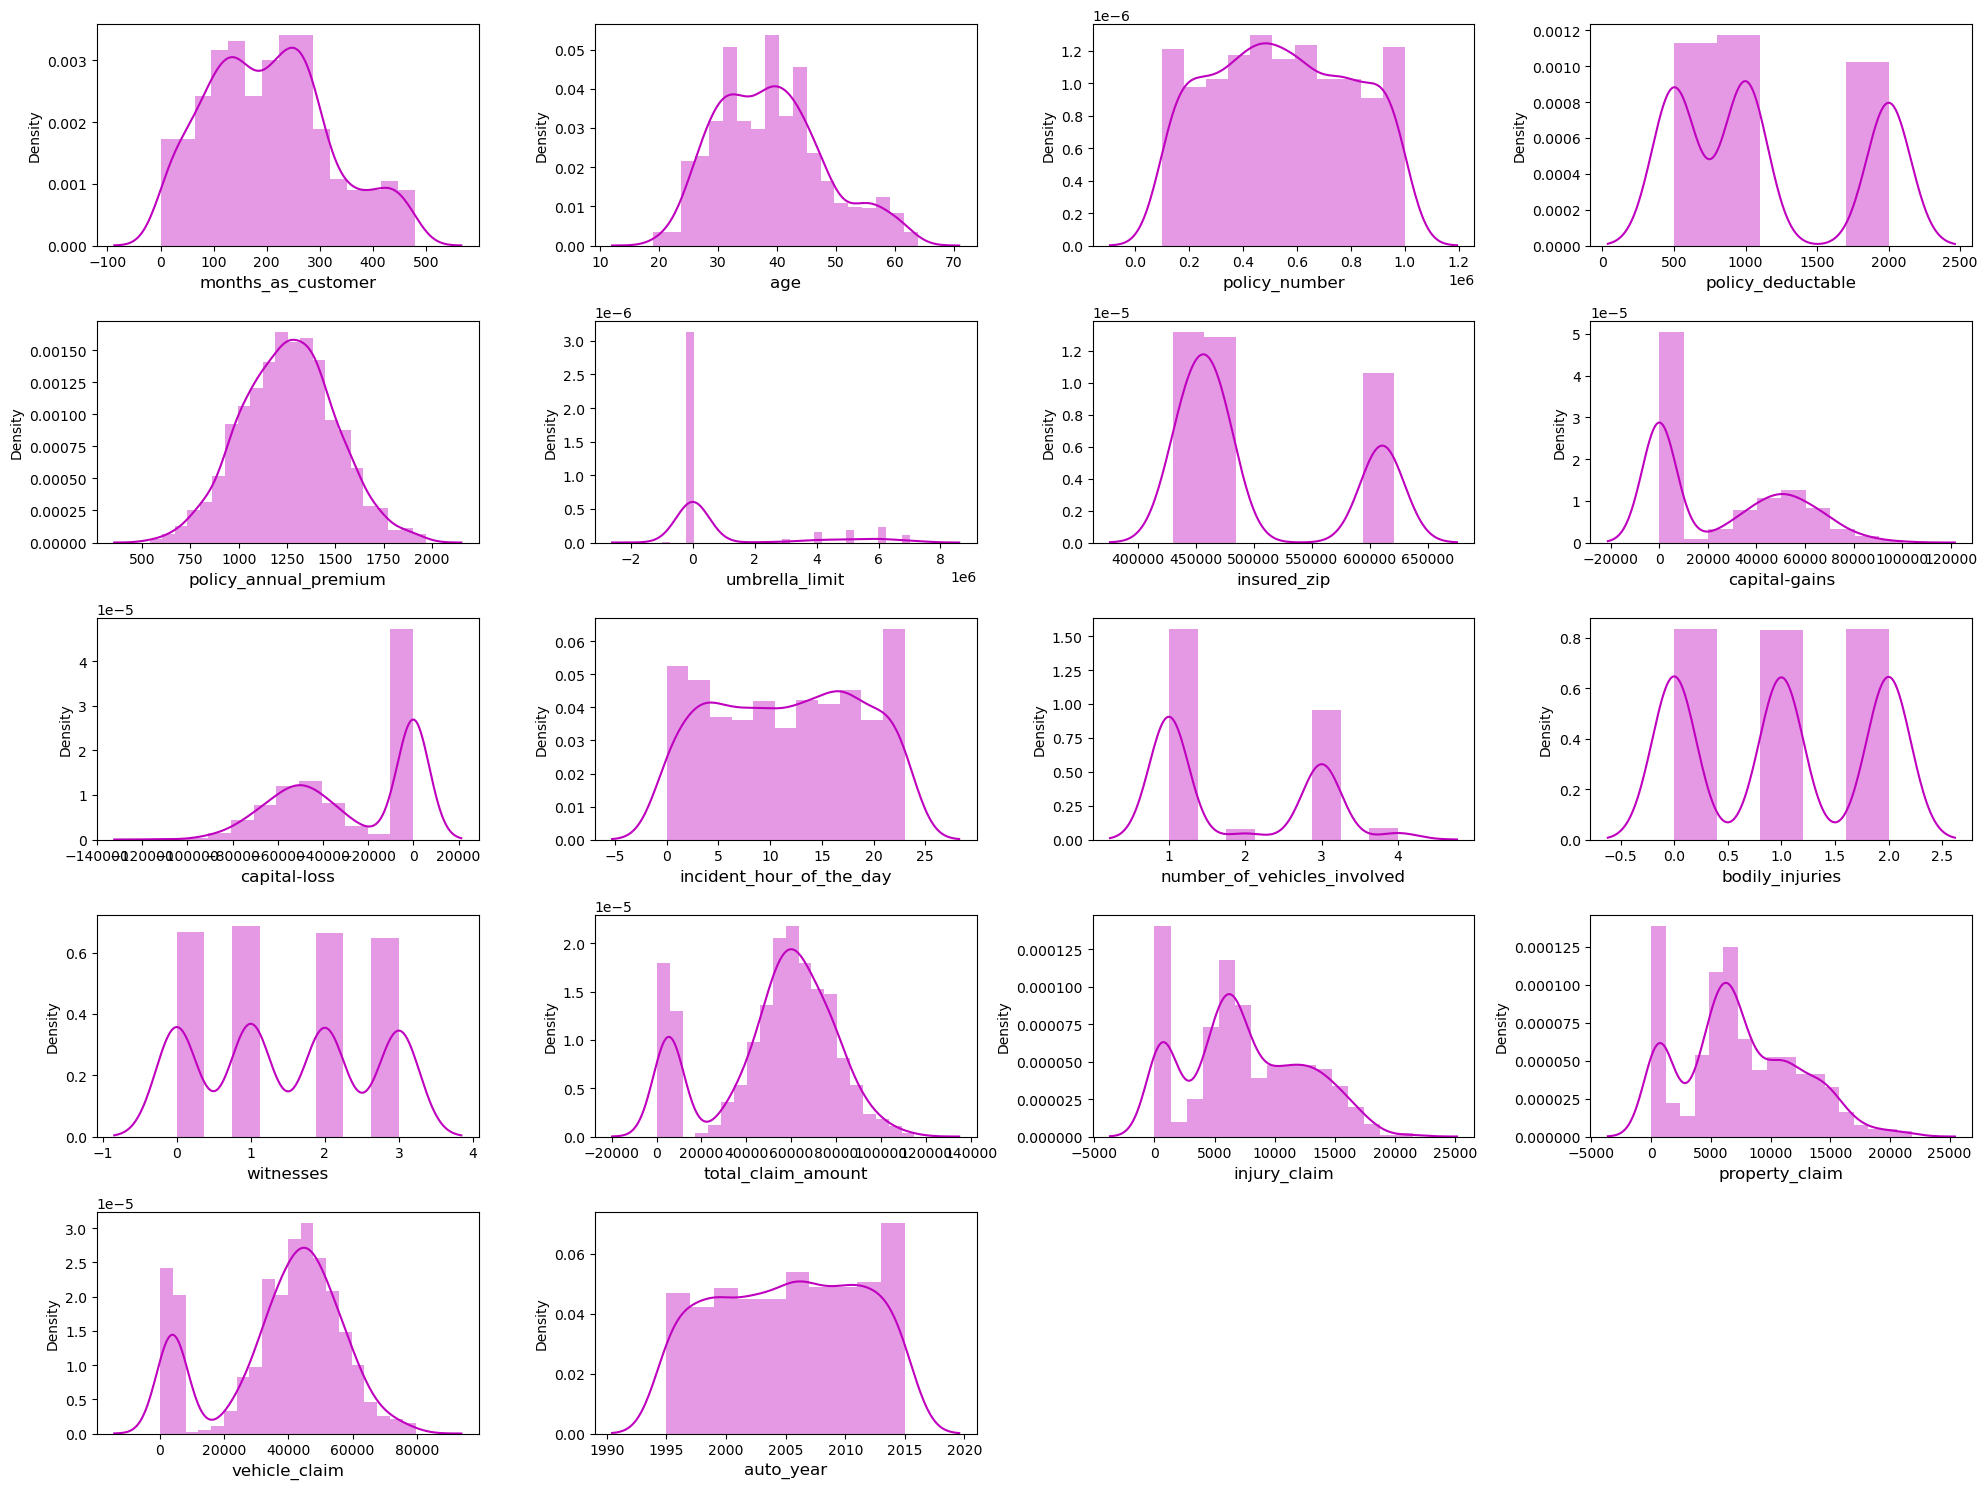

In [83]:
#lets check how data hss been distributed in remaing column-checking the column with inthe column
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in numerical_col:
    if plotnumber<=20:
        ax=plt.subplot(5,4, plotnumber)#subplot is used to plot diff plot on single image
        sns.distplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()   

we can observe there is some skewness in data.

# ENCODING

In [84]:
#by using replace method we can change the type column
df['fraud_reported'] = df['fraud_reported'].replace(['Y', 'N'], ['0', '1'])

In [85]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,522.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,0.0
1,228,42,342868,805.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,0.0
2,134,29,687698,185.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,1.0
3,256,41,227811,750.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,0.0
4,228,44,367455,180.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,477.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,1.0
996,285,41,186934,128.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,1.0
997,130,34,918516,499.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,1.0
998,458,62,533940,561.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,1.0


In [86]:
#checking skewness
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_bind_date               0.007029
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.838685
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_date                  0.003842
incident_type                  0.092461
collision_type                -0.195016
incident_severity              0.278443
authorities_contacted         -0.294526
incident_state                -0.147048
incident_city                  0.042537
incident_location              0.000000


In [87]:
# removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

df.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_bind_date               0.007029
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                -7.939425
insured_zip                    0.000000
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_date                  0.003842
incident_type                  0.092461
collision_type                -0.195016
incident_severity              0.278443
authorities_contacted         -0.294526
incident_state                -0.147048
incident_city                  0.042537
incident_location              0.000000


#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()umbrella_limit has high skewness we can dropit after checking the vif values

In [88]:
#check the corr
cor = df.corr()
cor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922960,0.061414,0.054977,-0.007179,-0.021865,0.030777,-0.003875,-0.001591,0.031965,...,0.063289,0.024700,0.059193,0.064864,0.036471,0.056256,0.049912,0.005350,0.001145,-0.021375
age,0.922960,1.000000,0.062414,0.056760,-0.020009,-0.013330,0.031851,0.005290,0.001445,0.034667,...,0.056159,0.019540,0.068347,0.077002,0.062231,0.059056,0.033873,0.015456,0.005767,-0.013338
policy_number,0.061414,0.062414,1.000000,0.052808,0.071324,0.042022,-0.011445,0.028229,0.001055,0.007074,...,-0.007174,0.030845,-0.017609,-0.007545,-0.012333,-0.019580,0.018083,0.066096,-0.003594,0.036190
policy_bind_date,0.054977,0.056760,0.052808,1.000000,0.015243,0.003469,0.003576,-0.040923,0.010655,-0.047906,...,-0.008574,-0.033788,0.006969,0.014385,0.002292,0.005368,-0.022193,0.002603,0.030692,-0.060687
policy_state,-0.007179,-0.020009,0.071324,0.015243,1.000000,0.001651,0.017559,0.015079,-0.031679,0.022946,...,0.025779,0.072119,-0.015077,-0.048189,-0.006442,-0.006424,0.010283,-0.017956,-0.001116,-0.034595
policy_csl,-0.021865,-0.013330,0.042022,0.003469,0.001651,1.000000,0.009999,0.032677,0.033579,0.006947,...,0.071387,-0.005250,-0.053352,-0.079989,-0.042783,-0.042663,-0.009480,0.042770,-0.030441,0.032542
policy_deductable,0.030777,0.031851,-0.011445,0.003576,0.017559,0.009999,1.000000,-0.007754,0.029543,-0.010072,...,0.073531,0.028756,0.025521,0.039835,0.072395,0.005720,-0.029963,-0.004556,0.028073,-0.014936
policy_annual_premium,-0.003875,0.005290,0.028229,-0.040923,0.015079,0.032677,-0.007754,1.000000,-0.016924,0.048572,...,0.003949,0.022772,-0.000647,-0.023726,-0.013674,0.009414,0.008776,-0.038708,-0.043022,0.012900
umbrella_limit,-0.001591,0.001445,0.001055,0.010655,-0.031679,0.033579,0.029543,-0.016924,1.000000,0.021939,...,0.006723,-0.004078,-0.068208,-0.039609,-0.056818,-0.070521,0.028656,0.001282,0.051259,-0.046260
insured_zip,0.031965,0.034667,0.007074,-0.047906,0.022946,0.006947,-0.010072,0.048572,0.021939,1.000000,...,0.019261,-0.029495,-0.034680,-0.020253,-0.007955,-0.041906,-0.020234,0.024260,-0.040156,-0.020271


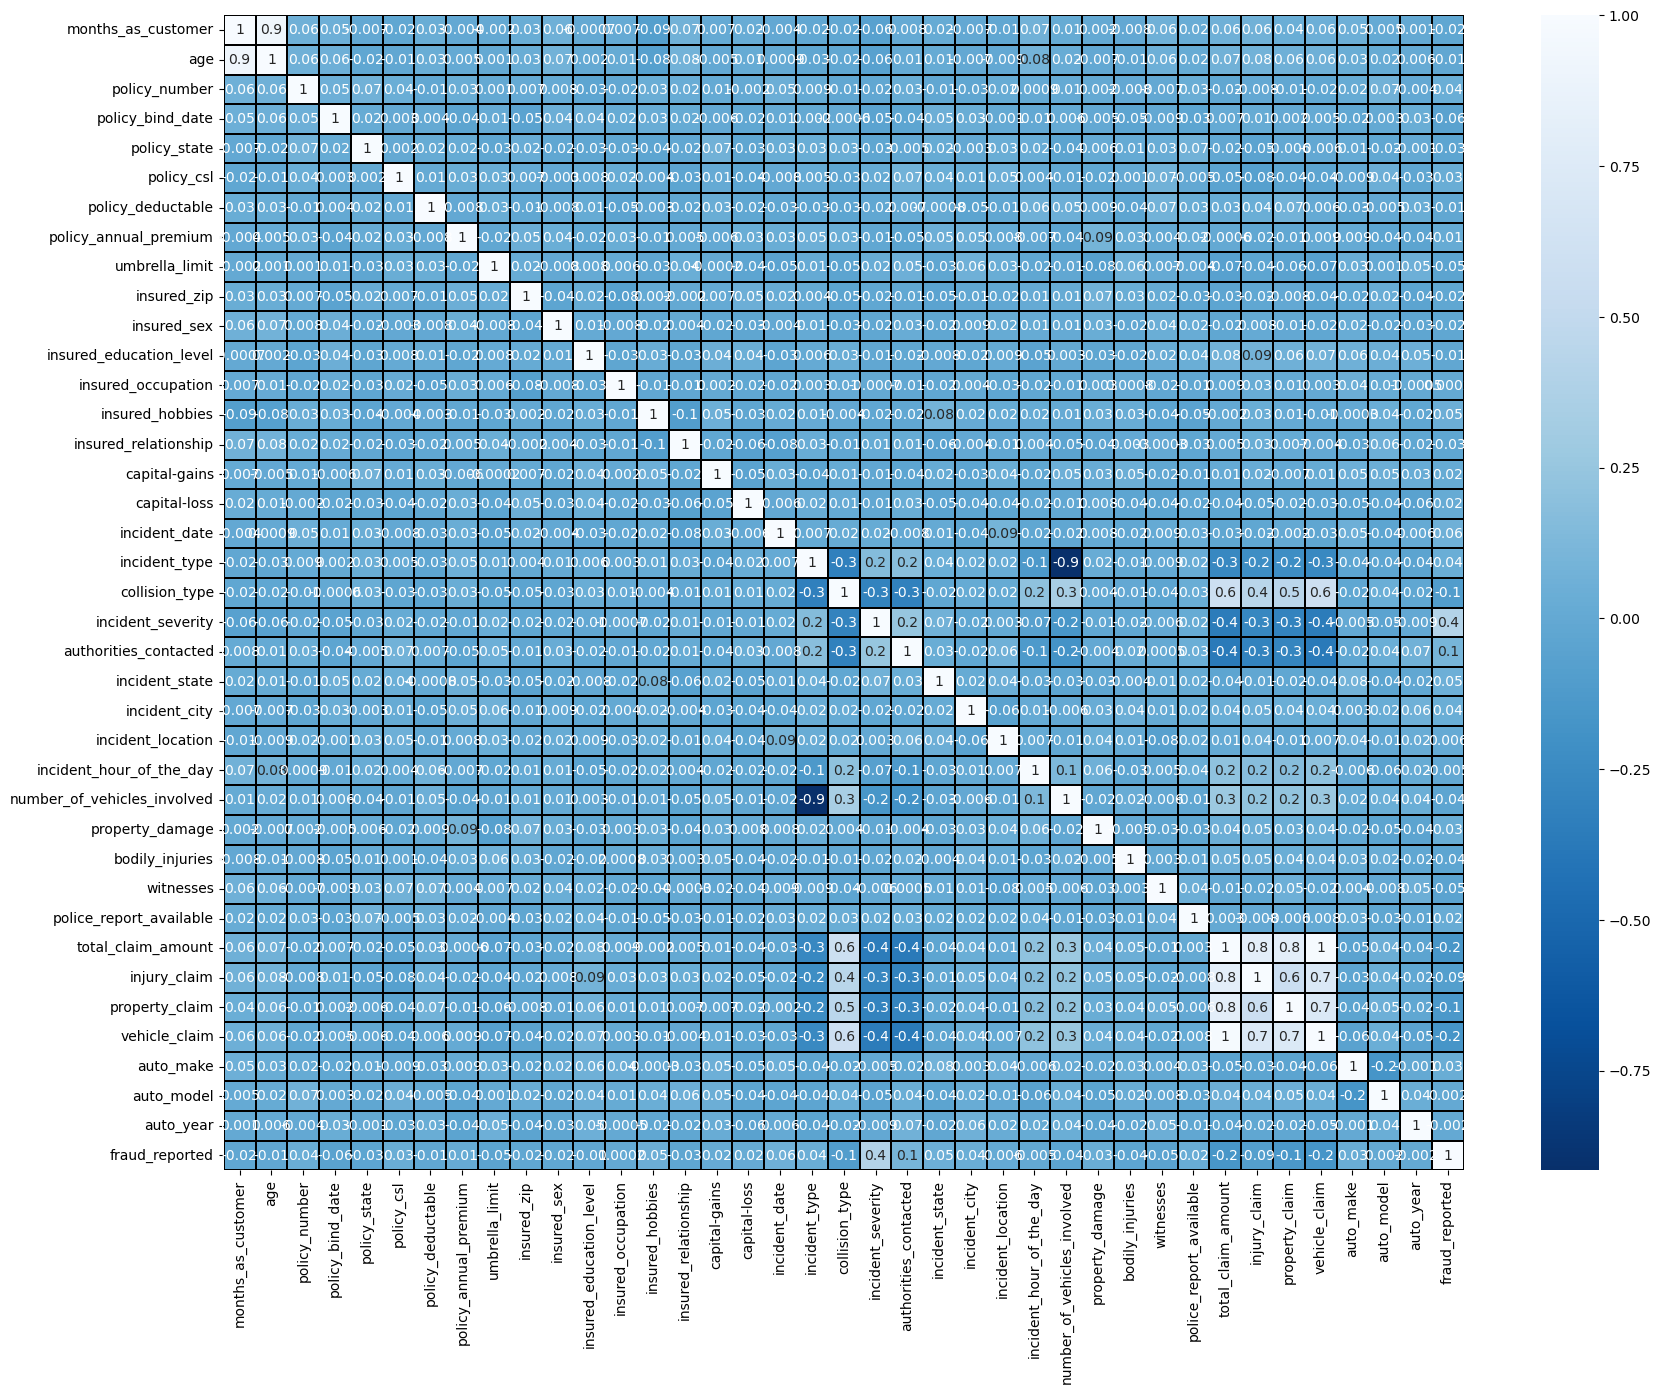

In [89]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

total_claim_amount,injury_claim,property_claim and vehicle_claim are highly positively correlated to each other.

# Seperating the label and features

In [90]:
x=df.drop('fraud_reported', axis=1)
y=df["fraud_reported"]

In [91]:
print(x.shape)
print(y.shape)

(981, 38)
(981,)


feature scaling using standardscaler

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)#

In [93]:
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.070264,0.983956,-0.094588,0.211282,1.180447,0.067197,-0.225968,0.619923,-0.336839,-0.399353,...,0.001248,0.464781,1.267282,0.719485,-0.188645,1.174939,0.757816,0.852973,-1.638317,-0.186701
1,0.202991,0.329985,-0.788948,1.259754,-0.024567,0.067197,1.410009,-0.248937,1.483266,-0.348750,...,-1.222563,-1.333838,-1.204296,-1.778833,-1.362026,-1.379994,-1.788203,0.356523,-0.650052,0.311903
2,-0.612245,-1.086951,0.550801,-1.037252,1.180447,-1.176582,1.410009,0.645737,1.483266,-1.208994,...,1.225058,1.364090,0.031493,-0.717305,0.055042,-0.739173,-0.821553,-0.636377,0.967110,0.311903
3,0.445828,0.220990,-1.235972,1.055988,-1.229581,0.067197,1.410009,0.656510,1.789387,1.472942,...,0.001248,0.464781,0.031493,0.394103,-0.223457,-0.219420,0.681441,-0.884602,1.326479,1.475311
4,0.202991,0.547975,-0.693421,-1.055776,-1.229581,1.310976,-0.225968,1.353331,1.789387,1.472942,...,-1.222563,-0.434529,0.031493,-1.731679,-1.255541,-1.407130,-1.741666,-1.629278,1.056952,0.644305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.748372,-0.105995,1.538248,0.044564,1.180447,1.310976,-0.225968,0.221687,-0.336839,-1.208994,...,-1.222563,-0.434529,-1.204296,1.344860,2.049585,0.277372,1.265257,-0.139927,-1.189106,0.145701
977,0.697337,0.220990,-1.394790,-1.248428,-1.229581,-1.176582,-0.225968,0.743732,-0.336839,1.472942,...,1.225058,1.364090,-1.204296,2.211895,2.180643,2.231144,1.913524,1.597649,0.787425,1.641513
978,-0.646936,-0.541976,1.447586,0.126071,1.180447,0.067197,-1.043957,0.522881,0.840603,-0.905378,...,1.225058,1.364090,1.267282,0.556225,0.014086,0.022714,0.781439,1.101198,-0.021156,-1.516311
979,2.197719,2.509887,-0.046586,0.355771,-1.229581,1.310976,1.410009,0.412787,1.483266,-0.905378,...,-1.222563,-0.434529,1.267282,-0.246792,-0.452809,-0.453205,-0.103047,-1.381053,-1.278948,-1.183908


In [94]:
#checking VIF  values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,6.901098,months_as_customer
1,6.920225,age
2,1.033537,policy_number
3,1.030762,policy_bind_date
4,1.037070,policy_state
5,1.035834,policy_csl
6,1.045168,policy_deductable
7,1.040565,policy_annual_premium
8,1.038489,umbrella_limit
9,1.045460,insured_zip


we can also observe total_claim_amount,injury_claim,property_claim and vehicle_claim are highly positively correlated to each other.
we can drop total_claim_amount and 24571.457004

In [95]:
#dropping the ER column
x.drop(columns=["total_claim_amount","vehicle_claim"], axis=1, inplace=True)

In [96]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,6.869947,months_as_customer
1,6.901982,age
2,1.033239,policy_number
3,1.030576,policy_bind_date
4,1.036956,policy_state
5,1.033962,policy_csl
6,1.040252,policy_deductable
7,1.039096,policy_annual_premium
8,1.035034,umbrella_limit
9,1.038886,insured_zip


all the values are in range

# DATA MODELLING

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

In [100]:
model=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
        GradientBoostingRegressor(),SVR()]
max_r2_score=0
for ran_state in range(40,80):
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=ran_state)
        for i in model:
            i.fit(x_train,y_train)
            pred=i.predict(x_test)
            r2_sco=r2_score(y_test,pred)
            print("R2 SCORE CORRESPOND TO RANDOM STATE", ran_state ,"and model is",r2_sco)
            if r2_sco>max_r2_score:
                   max_r2_score=r2_sco 
                   final_state=ran_state
                   final_model=i

print("\n")
print("max R2 SCORE CORRESPOND TO RANDOM STATE", final_state ,"is",max_r2_score ,"and model is",final_model)

R2 SCORE CORRESPOND TO RANDOM STATE 40 and model is 0.11658976371259278
R2 SCORE CORRESPOND TO RANDOM STATE 40 and model is -0.24464962700256843
R2 SCORE CORRESPOND TO RANDOM STATE 40 and model is -0.03612571847865964
R2 SCORE CORRESPOND TO RANDOM STATE 40 and model is 0.36867943622355404
R2 SCORE CORRESPOND TO RANDOM STATE 40 and model is 0.32144814467151683
R2 SCORE CORRESPOND TO RANDOM STATE 40 and model is 0.014883684222911309
R2 SCORE CORRESPOND TO RANDOM STATE 41 and model is 0.10992568985408235
R2 SCORE CORRESPOND TO RANDOM STATE 41 and model is -0.10034242387183578
R2 SCORE CORRESPOND TO RANDOM STATE 41 and model is -0.10755778402837235
R2 SCORE CORRESPOND TO RANDOM STATE 41 and model is 0.33569802494802525
R2 SCORE CORRESPOND TO RANDOM STATE 41 and model is 0.31871308467629766
R2 SCORE CORRESPOND TO RANDOM STATE 41 and model is 0.03348935102255379
R2 SCORE CORRESPOND TO RANDOM STATE 42 and model is 0.11440009969744958
R2 SCORE CORRESPOND TO RANDOM STATE 42 and model is -0.0544

In [104]:
RFR=RandomForestRegressor(random_state=58)
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("R2_score on testing:",r2_score(y_test,pred_RFR)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR))
print("Mean squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean square Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score on training data: 91.09232135354564
R2_score on testing: 36.434064383737365
Mean Absolute Error: 0.49836707756501025
Mean squared Error: 0.616377116310986
Root Mean square Error: 0.7850968833914614


In [105]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Maximum r2_score", maxAccu, "at random_state", maxRS)

Maximum r2_score 0.2147902596202116 at random_state 98
